Neural Network 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
data = pd.read_csv('/content/mnist_train.csv')
data.shape

(10320, 785)

In [ ]:
data = np.array(data)
m,n = data.shape
m,n

(10320, 785)

In [ ]:
np.random.shuffle(data)

In [ ]:
test_data = data[0:1000].T # transposes
# each column is pixels of an individual number 

Y_test = test_data[0] # Since first row contains all labels due to transpose
X_test = test_data[1:n]
X_test = X_test/255
#X_test[0:,1] # prints the first element of 1st column and all rows [one number from dataset]

In [ ]:
train_data = data[1000:m]

**Digit Recognition**

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train[0]

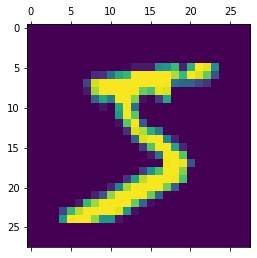

In [ ]:
plt.matshow(x_train[0])

Scaling : If accuracy is less we can scale the data to improve

> Example : x_train = x_train/255

In [ ]:
x_train = x_train/255
x_test = x_test/255

Flattening of data:

> Converting (28 28) matrix into (784 1) matrix(vector)

In [ ]:
x_train_flat = x_train.reshape(len(x_train),784)
x_test_flat = x_test.reshape(len(x_test),-1)

In [ ]:
x_train_flat.shape
#x_test_flat.shape

(60000, 784)

In [ ]:
len(x_train_flat[0])

784

**Model**

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=[784],activation='sigmoid')  # 10 is no of output neurons
])              # Dense is used because each input neuron is connected to all other output neurons


model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)

model.fit(x_train_flat, y_train, epochs= 1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4692 - accuracy: 0.8767


In [ ]:
y_predict = model.predict(x_test_flat)

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_predict[15]

array([1.5620621e-01, 2.0732146e-03, 1.2093370e-01, 5.6321788e-01,
       1.6096719e-02, 9.1597730e-01, 1.1903789e-02, 5.8227996e-03,
       6.1752570e-01, 4.2492370e-04], dtype=float32)

In [ ]:
np.argmax(y_predict[15])

5

In [ ]:
y_predicted = [np.argmax(i) for i in y_predict]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)

In [ ]:
cm.shape

TensorShape([10, 10])

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt = 'd')

**Adding hidden layers**

In [ ]:
model1 = keras.Sequential([
    # keras.layers.flatten(input_shape=(28,28))  can be used instead of flattening manually
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), # 100 is no of hidden neurons
    keras.layers.Dense(10,activation='sigmoid') # 10 is no of outputs
])

model1.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model1.fit(x_train_flat,y_train,epochs=5)
y_predict2 = model.predict(x_test_flat)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2821 - accuracy: 0.9186
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1296 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0901 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0684 - accuracy: 0.9790
Epoch 5/5
313/313 [==============================] - 0s 1ms/step


In [ ]:
y_predict2

In [ ]:
y_predicted2 = [np.argmax(i) for i in y_predict2]

In [ ]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted2)

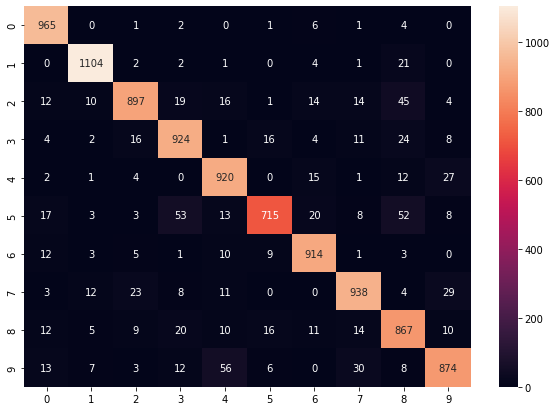

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True,fmt='d')

**ACTIVATION FUNCTIONS**

Sigmoid :

>  sigmoid(z) = 1/(1 + e^-z)

In [ ]:
import math

def sigmoid(x):
  return 1/(1+math.exp(-x))

sigmoid(0)

0.5

Tanh:

> tanh(z) = (e^z - e^-z) / (e^z + e^-z)

In [ ]:
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

tanh(1)

0.7615941559557649

ReLU:

> relu(x) = max(0,x)

In [ ]:
def relu(x):
  return max(0,x)

relu(-10)

0

**LOSS and COST FUNCTION**

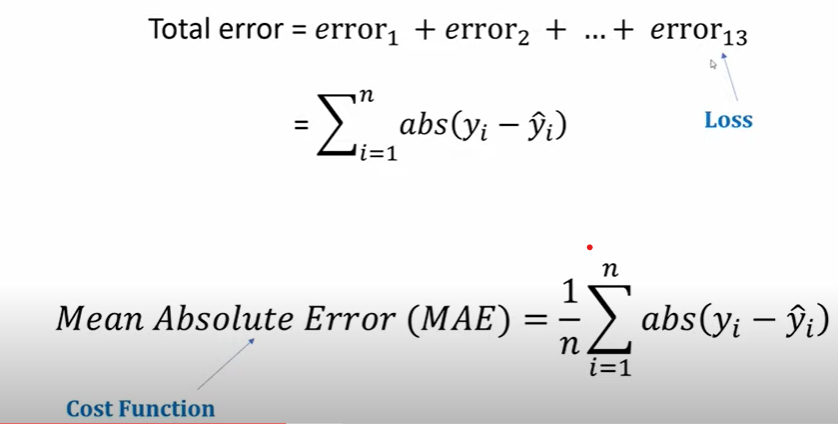

**Regression Loss Functions**
>Mean Squared Error Loss

>Mean Squared Logarithmic Error Loss

>Mean Absolute Error Loss

**Binary Classification Loss Functions**

>Binary Cross-Entropy

>Hinge Loss

>Squared Hinge Loss

**Multi-Class Classification Loss Functions**

>Multi-Class Cross-Entropy Loss

>Sparse Multiclass Cross-Entropy Loss

>Kullback Leibler Divergence Loss

**GRADIENT DESCENT**
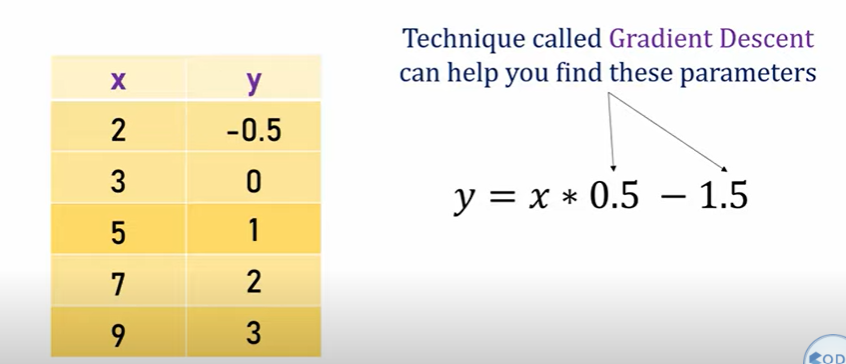

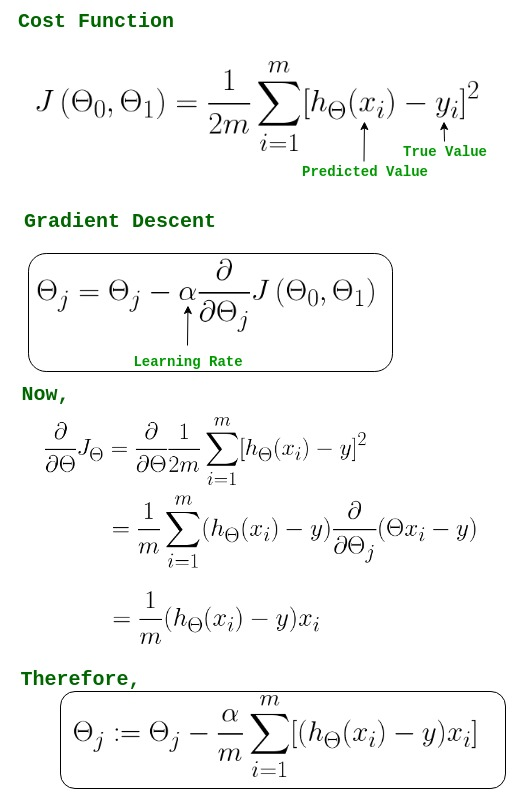

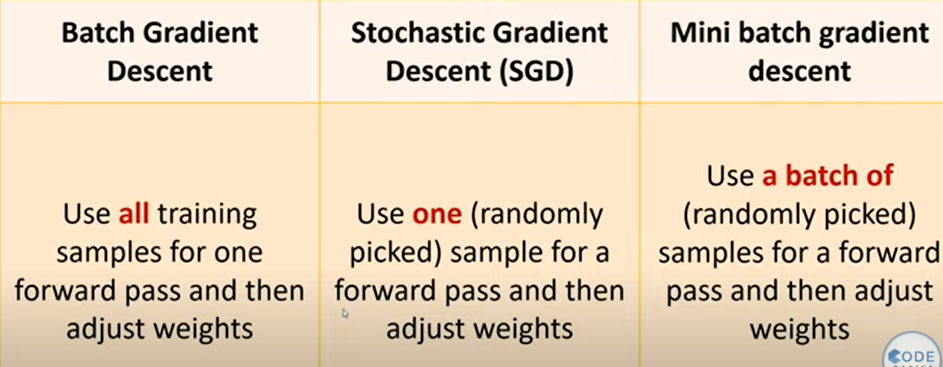

**CUSTOMER CHURN PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

In [ ]:
df.drop("customerID",axis=1,inplace=True)

In [ ]:
df.dtypes
#df.isna().sum()

In [ ]:
#pd.to_numeric(df.TotalCharges)

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull() # converts any dtype into numeric

In [ ]:
# returns the rows where there are null values in the defined column
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

In [ ]:
df1 = df[df.TotalCharges!=' '] # takes all the non empty rows
df1.shape

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.dtypes

**VISUALISATION**

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('count')
plt.title('Churn basd on tenure')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],label=['Churn=Yes',"Churn=No"])
plt.legend()

**Data Preprocessing**

In [ ]:
df1.nunique()

for column in df1:
  if df1[column].dtypes == 'object':
    print(f'{column}:{df1[column].unique()}')

ENCODING

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
df1.replace({'Female':0,'Male':1},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService',	'MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV',	'StreamingMovies','PaperlessBilling','Churn']

In [ ]:
for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

df1.dtypes

In [ ]:
df1 = pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])

In [ ]:
df1.head()

SCALING

In [ ]:
scale_cols = ['tenure','PaperlessBilling','MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1[scale_cols] = scaler.fit_transform(df1[scale_cols])

In [ ]:
df1.head()
df1.dtypes

**Train-Test**

In [ ]:
X = df1
Y = df1['Churn']
X.drop("Churn",axis=1,inplace=True)

In [ ]:
Y[:5]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
y_train[:3]

**MODEL**

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(20,input_shape=(26,),activation='relu'),
    #layers.Dense(15,activation='relu'), # Hidden Layer
    layers.Dense(1,activation='sigmoid') # Output Layer
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=50)

In [ ]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7832


[0.5699423551559448, 0.783226728439331]

In [ ]:
y_predict = model.predict(x_test)

44/44 [==============================] - 0s 2ms/step


In [ ]:
y_predict[:5]

array([[8.7821133e-02],
       [2.5334927e-01],
       [3.5840341e-05],
       [7.3999679e-01],
       [2.6002306e-01]], dtype=float32)

In [ ]:
y_pred=[]

for i in y_predict:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       999
           1       0.71      0.43      0.53       408

    accuracy                           0.78      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.77      0.78      0.76      1407



In [ ]:
cm = confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

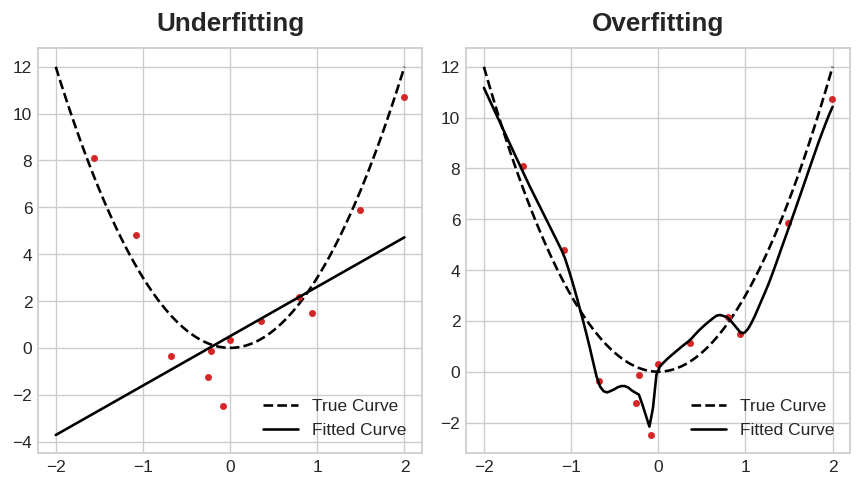

**Dropout - Regularization**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("over-under.csv")

In [ ]:
df.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [ ]:
df.shape
df.columns

Index(['0.02', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.066', '0.2273', '0.31', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.555', '0.6711', '0.6415', '0.7104', '0.808',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.051', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.018', '0.0084', '0.009', '0.0032'],
      dtype='object')

In [ ]:
X = df
Y = df.iloc[:,60:]

In [ ]:
Y.head()
X.shape
Y.tail()

In [ ]:
X.drop('R',axis=1,inplace=True)

In [ ]:
Y.replace({'R':0,'M':1},inplace=True)
Y.value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


R
1    111
0     96
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.25,random_state=1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

model = keras.Sequential([
    layers.Dense(60,input_shape=(60,),activation='relu'),
    layers.Dense(30,activation='relu'),
    layers.Dense(20,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_x,train_y,epochs=20,batch_size=8)

In [ ]:
model.evaluate(test_x,test_y)

2/2 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.9038


[0.3688660264015198, 0.9038461446762085]

In [ ]:
y_predict = model.predict(test_x)

2/2 [==============================] - 0s 6ms/step


In [ ]:
y_predict[1]

array([0.9415589], dtype=float32)

In [ ]:
y_predicted = np.round(y_predict)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_y,y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.87      0.96      0.91        27

    accuracy                           0.90        52
   macro avg       0.91      0.90      0.90        52
weighted avg       0.91      0.90      0.90        52



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

model = keras.Sequential([
    layers.Dense(60,input_shape=(60,),activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(30,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(20,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_x,train_y,epochs=20,batch_size=8)

In [ ]:
model.evaluate(test_x,test_y)

**CNN**

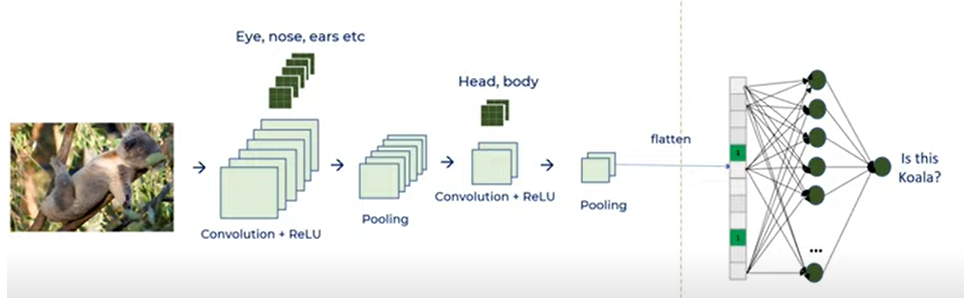

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_train, y_train, 0)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
ann = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(x_train,y_train,epochs=3)

In [ ]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.5540 - accuracy: 0.4570


[1.5540403127670288, 0.4569999873638153]

In [ ]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4693 - accuracy: 0.4732
Epoch 2/3
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1178 - accuracy: 0.6073
Epoch 3/3
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9848 - accuracy: 0.6563


In [ ]:
y_pred = cnn.predict(X_test)
y_predicted = [np.argmax(element) for element in y_pred]

In [ ]:
y_predicted[:5]

[8, 8, 1, 0, 8]

In [ ]:
y_test[:5]